# Sistema de recomendação por imagens

<p align="left">
  <img src="https://img.shields.io/static/v1?label=&message=Python&color=blue&style=for-the-badge&logo=python"/>
  <img src="https://img.shields.io/static/v1?label=&message=PyTorch&color=blue&style=for-the-badge&logo=pytorch"/>
  <img src="https://img.shields.io/static/v1?label=&message=matplotlib&color=blue&style=for-the-badge&logo=matplotlib"/>
  <img src="http://img.shields.io/static/v1?label=STATUS&message=CONCLUIDO&color=GREEN&style=for-the-badge"/>
</p>


Este Projeto foi realizado por Maurício André de Almeida como trabalho no curso de Treinamento de Redes Neurais com Transfer Learning na DIO.ME


# Projeto de Transfer Learning em Python

Depois de entender o funcionamento de Sistemas de Recomendação e suas aplicações, neste projeto vamos então desenvolver um modelo capaz de classificar imagens por sua similaridade e gerar resultados para o usuário de um site. Os resultados esperados são direcionados para, por meio de um produto buscado na internet, o Sistema de Recomendação deve indicar produtos relacionados, mas não por seus dados textuais (preço, modelo, marca, loja) e, sim, por sua aparência física (formato, cor, textura, etc).  

Para que este sistema seja desenvolvido, vamos treinar uma rede de Deep Learning com várias classes de objetos, como por exemplo: relógio, camiseta, bicicleta, sapato, etc.  Dentro de cada classe devemos ter objetos que são parecidos em sua aparência, como pode ser visto na figura a seguir: 

![relogios.png](.\relogios.png)

Para exemplo, podemos então utilizar o sistema de recomendação por imagens apresentado a seguir: https://colab.research.google.com/github/sparsh-ai/rec-tutorials/blob/master/_notebooks/2021-04-27-image-similarity-recommendations.ipynb 



### <b>Implementação:</b>

Neste projeto utilizei o pyTorch com o modelo RESNET18 pré-treinado com IMAGENET e retreinado com o dataset FashionMNIST

Realizei os seguintes passos para cumprir o desafio:

<ul>
<li>Carregar as bibliotecas necessárias</li>
<li>Verificar a disponibilidade da GPU com CUDA</li>
<li>Carregar o modelo ResNet18 pré-treinado</li>
<li>Modificar a camada final para 10 classes (FashionMNIST tem 10 classes)</li>
<li>Carregar e preparar o dataset FashionMNIST</li>
<li>Treinar o modelo com o novo dataset </li>
<li>Avaliar o modelo treinado</li>
<li>Salvar o modelo para futura utilização</li>
<li>Criar funções auxiliares para:</li>
<ul>
  <li>Carregar e pré-processar a imagem</li>
  <li>Prever a categoria da imagem</li>
  <li>Buscar itens semelhantes no Mercado Livre</li>
  <li>Realizar todo o processamento de uma imagem, reconhecendo o item e mostrando itens similares na WEB</li>
</ul>
<li>Realizar testes com algumas imagens encontradas na internet</li>
</ul>



<b>Citação do DATASET:</b>


Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747

Biblatex entry:

@online{xiao2017/online,
  author       = {Han Xiao and Kashif Rasul and Roland Vollgraf},
  title        = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms},
  date         = {2017-08-28},
  year         = {2017},
  eprintclass  = {cs.LG},
  eprinttype   = {arXiv},
  eprint       = {cs.LG/1708.07747},
}



## Para iniciarmos, vamos carregar todas as bibliotecas necessárias:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.models import resnet18, ResNet18_Weights
import requests
from PIL import Image

# Verificar disponibilidade de CUDA

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
learning_rate = 0.001
num_epochs = 1


# Carregar o modelo ResNet18 pré-treinado

In [ ]:

model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)


# Modificar a camada final para 10 classes (FashionMNIST tem 10 classes)

In [ ]:

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)
model = model.to(device)


# Carregar e preparar o dataset FashionMNIST

In [ ]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet18 espera imagens 224x224
    transforms.Grayscale(num_output_channels=3),  # Converter para 3 canais (RGB)
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizar
])


In [ ]:

train_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



# Treinar o modelo com o novo dataset 

In [ ]:

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}"
            )

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/1], Step [100/938], Loss: 0.2708
Epoch [1/1], Step [200/938], Loss: 0.2702
Epoch [1/1], Step [300/938], Loss: 0.2173
Epoch [1/1], Step [400/938], Loss: 0.2501
Epoch [1/1], Step [500/938], Loss: 0.1922
Epoch [1/1], Step [600/938], Loss: 0.2388
Epoch [1/1], Step [700/938], Loss: 0.2705
Epoch [1/1], Step [800/938], Loss: 0.1052
Epoch [1/1], Step [900/938], Loss: 0.3886
Epoch [1/1], Loss: 0.2945


# Avaliar o modelo treinado

In [ ]:

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Acurácia no conjunto de teste: {100 * correct / total:.2f}%")

Acurácia no conjunto de teste: 90.92%


# Salvar o modelo para utilização futura

In [ ]:

model_path = "./Modelo_RESNET18_FashionMNIST_completo.pth"
torch.save(model, model_path)

In [ ]:
# Descomentar se for necessário carregar novamente o modelo salvo

#model_path = "./Modelo_RESNET18_FashionMNIST_completo.pth"
#model = torch.load(model_path)
#model = model.to(device)

## Funções utilizada no teste final do modelo

In [ ]:
# Rotulos das categorias
categories = [
        "Camiseta", "Calça", "Moletom", "Vestido", "Casaco",
        "Sandalia", "Camisa social", "Tenis", "Bolsa feminina", "Bota"
    ]

# Função para carregar e pré-processar a imagem
def preprocess_image(image_path):
    # Carregar a imagem
    image = Image.open(image_path)
    # Função para inverter cores
    def invert_colors(image):
        return Image.eval(image, lambda x: 255 - x)

    # Definir as transformações necessárias
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Redimensionar para 224x224
        transforms.Lambda(invert_colors),      # Inverter a imagem para gerar imagem com fundo preto 
        transforms.Grayscale(num_output_channels=3),  # Converter para 3 canais (RGB)
        transforms.ToTensor(),  # Converter para tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalizar
    ])

    # Aplicar as transformações e adicionar uma dimensão de batch
    image = transform(image).unsqueeze(0)
    return image

In [ ]:
# Função para prever a categoria da imagem
def predict_image(image_path, model, device):
    # Pré-processar a imagem
    image = preprocess_image(image_path).to(device)

    # Colocar o modelo em modo de avaliação
    model.eval()

    # Fazer a previsão
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    print(predicted.item())
    # Mapear o índice previsto para a categoria correspondente

    predicted_category = categories[predicted.item()]
    return predicted_category

In [ ]:
# Função para buscar itens semelhantes no Mercado Livre
def search_similar_items(category):
    # URL da API do Mercado Livre para buscar produtos
    url = f"https://api.mercadolibre.com/sites/MLB/search"
    
    # Parâmetros da busca
    params = {
        "q": category,  # Termo de busca (categoria prevista)
        "limit": 5      # Número de resultados a serem retornados
    }

    # Fazer a requisição à API
    response = requests.get(url, params=params)

    # Verificar se a requisição foi bem-sucedida
    if response.status_code == 200:
        results = response.json().get("results", [])
        
        # Exibir os resultados
        print(f"Produtos similares encontrados para a categoria '{category}':")
        for i, item in enumerate(results, start=1):
            title = item.get("title", "N/A")
            price = item.get("price", "N/A")
            link = item.get("permalink", "N/A")
            print(f"{i}. {title} | Preço: R${price} | Link: {link}")
    else:
        print("Erro ao buscar produtos. Tente novamente.")

In [ ]:
# Função principal que a partir da imagem, reconhece o item e busca itens similares na WEB
def recomendar_similares(img_file):
    
    categoria_prevista = predict_image(img_file, model, device)
    plt.imshow( Image.open(img_file))
    plt.title(f"A imagem foi classificada como: {categoria_prevista}")
    plt.show()

    print()
    search_similar_items(categoria_prevista)

# Realizar testes com algumas imagens encontradas na internet para mostrar recomendações de itens similares

9


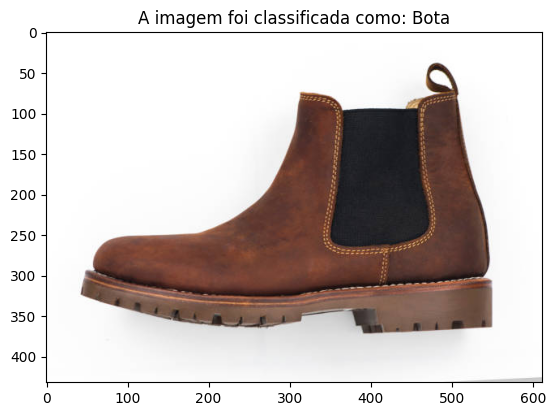


Produtos encontrados para a categoria 'Bota':
1. Bota Adventure Coturno Trabalho Seguranca Ca Moto Gel | Preço: R$147.13 | Link: https://produto.mercadolivre.com.br/MLB-3769553153-bota-adventure-coturno-trabalho-seguranca-ca-moto-gel-_JM
2. Bota Masculina Adventure Coturno Trilha Reforçada | Preço: R$101.2 | Link: https://produto.mercadolivre.com.br/MLB-3360868987-bota-masculina-adventure-coturno-trilha-reforcada-_JM
3. Bota Masculina Adventure Coturno Botina Com Brindes | Preço: R$119.9 | Link: https://produto.mercadolivre.com.br/MLB-3873285631-bota-masculina-adventure-coturno-botina-com-brindes-_JM
4. Sapato Feminino Antiderrapante Sticky Shoes Cozinha Nr32 | Preço: R$107.9 | Link: https://produto.mercadolivre.com.br/MLB-1694795571-sapato-feminino-antiderrapante-sticky-shoes-cozinha-nr32-_JM
5. Kit Botina De Segurança Ecosafety + Palmilha Confort Gel | Preço: R$135.15 | Link: https://produto.mercadolivre.com.br/MLB-1682043195-kit-botina-de-seguranca-ecosafety-palmilha-confort-gel-_J

In [59]:

recomendar_similares ("Bota1.jpg")


1


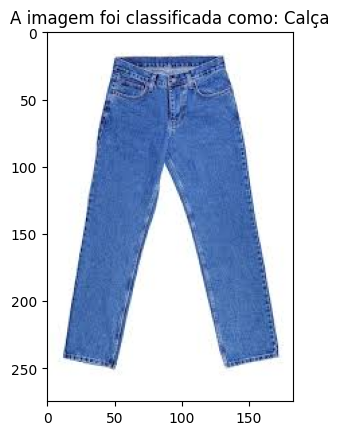


Produtos encontrados para a categoria 'Calça':
1. Kit 3 Calça Jeans Skinny Masculina Com Lycra Estica Muito Nf | Preço: R$149.9 | Link: https://produto.mercadolivre.com.br/MLB-2062548750-kit-3-calca-jeans-skinny-masculina-com-lycra-estica-muito-nf-_JM
2. Calça Skinny Preta Masculina Jeans Com Elastano Lycra 2023 | Preço: R$59 | Link: https://produto.mercadolivre.com.br/MLB-3365565438-calca-skinny-preta-masculina-jeans-com-elastano-lycra-2023-_JM
3. Calça Cargo Masculina Calca Jogger Streetwear Punho | Preço: R$54.82 | Link: https://produto.mercadolivre.com.br/MLB-5133195984-calca-cargo-masculina-calca-jogger-streetwear-punho-_JM
4. Kit 3 Calças Jeans Masculina Modelo Slim Envio Imediato | Preço: R$159.99 | Link: https://produto.mercadolivre.com.br/MLB-1914451249-kit-3-calcas-jeans-masculina-modelo-slim-envio-imediato-_JM
5. Calça Masculina Sarja Slim - Elastano - Esporte Fino | Preço: R$78.9 | Link: https://produto.mercadolivre.com.br/MLB-1782081524-calca-masculina-sarja-slim-elastano

In [60]:
recomendar_similares ("Calça1.jpg")


3


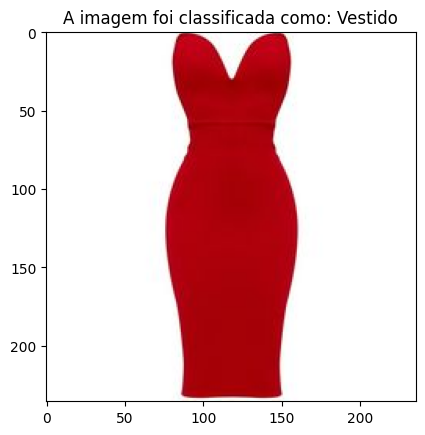


Produtos encontrados para a categoria 'Vestido':
1. Vestido Festa Longo Feminino Com Fenda Elegante Estiloso | Preço: R$69.74 | Link: https://produto.mercadolivre.com.br/MLB-4138585662-vestido-festa-longo-feminino-com-fenda-elegante-estiloso-_JM
2. Vestido Longo Feminino De Manguinhas Multiuso De Luxo | Preço: R$65.32 | Link: https://produto.mercadolivre.com.br/MLB-3324688721-vestido-longo-feminino-de-manguinhas-multiuso-de-luxo-_JM
3. Vestido Midi Canelado Casual Básico Modelador Sem Manga | Preço: R$38.94 | Link: https://produto.mercadolivre.com.br/MLB-3467701057-vestido-midi-canelado-casual-basico-modelador-sem-manga-_JM
4. Vestido Longo Viscolino Feminino Com Botões E Bojo Blogueira | Preço: R$66.99 | Link: https://produto.mercadolivre.com.br/MLB-4951016856-vestido-longo-viscolino-feminino-com-botoes-e-bojo-blogueira-_JM
5. Vestidos Mulformas Casamento Madrinhas Festa Varias Formas  | Preço: R$79.8 | Link: https://produto.mercadolivre.com.br/MLB-3294015201-vestidos-mulformas-casam

In [61]:
recomendar_similares ("Vestido1.jpg")

5


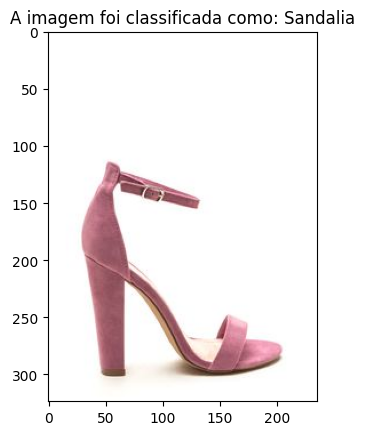


Produtos encontrados para a categoria 'Sandalia':
1. Sandália Crocs Lite Ride 360 Clog Black/slate Grey | Preço: R$327.18 | Link: https://produto.mercadolivre.com.br/MLB-2716546403-sandalia-crocs-lite-ride-360-clog-blackslate-grey-_JM
2. Sandália Feminina Brilho Strass Tendência Moda Original | Preço: R$64.7 | Link: https://produto.mercadolivre.com.br/MLB-3444315887-sandalia-feminina-brilho-strass-tendncia-moda-original-_JM
3. Sandália Feminina Brilho Salto Alto Bloco Vinil Transparente | Preço: R$65.99 | Link: https://produto.mercadolivre.com.br/MLB-2861248973-sandalia-feminina-brilho-salto-alto-bloco-vinil-transparente-_JM
4. Sandália Crocs Bayaband Clog Black/white | Preço: R$247.54 | Link: https://produto.mercadolivre.com.br/MLB-1815507746-sandalia-crocs-bayaband-clog-blackwhite-_JM
5. Sandália Tratorada Papete Plataforma Marrom Original Dubuy | Preço: R$135.79 | Link: https://produto.mercadolivre.com.br/MLB-5120596462-sandalia-tratorada-papete-plataforma-marrom-original-dubuy-_JM

In [62]:
recomendar_similares ("Sandalia1.jpg")

4


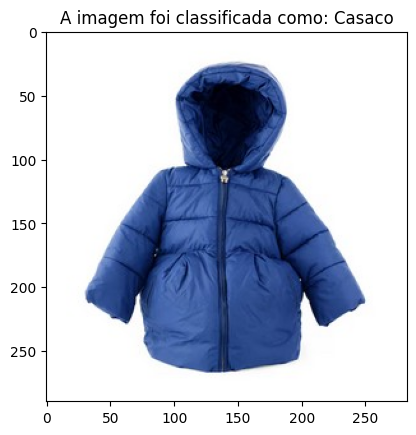


Produtos encontrados para a categoria 'Casaco':
1. Moletom Canguru Unisex Liso Casaco | Preço: R$47.92 | Link: https://produto.mercadolivre.com.br/MLB-3716643248-moletom-canguru-unisex-liso-casaco-_JM
2. Casaco Jaqueta Blusa Frio Impermeável P/neve Intensa Moto | Preço: R$75.04 | Link: https://produto.mercadolivre.com.br/MLB-5048977596-casaco-jaqueta-blusa-frio-impermeavel-pneve-intensa-moto-_JM
3. Casaco Blusa Moletom Canguru Ziper Unissex Grande Plus Size | Preço: R$88.02 | Link: https://produto.mercadolivre.com.br/MLB-2769879138-casaco-blusa-moletom-canguru-ziper-unissex-grande-plus-size-_JM
4. Blusa Grande Impermeável Corta Vento Preto Plus Size Liso | Preço: R$59.99 | Link: https://produto.mercadolivre.com.br/MLB-4703189166-blusa-grande-impermeavel-corta-vento-preto-plus-size-liso-_JM
5. Blusa De Frio Moletom Masculino Casaco Quiksilver | Preço: R$89.09 | Link: https://produto.mercadolivre.com.br/MLB-3796752209-blusa-de-frio-moletom-masculino-casaco-quiksilver-_JM


In [67]:
recomendar_similares ("Casaco1.jpg")